### SESSION04_딥러닝 3: Focus on TRANSFORMER

#### 1. RNN / LSTM의 한계

##### <span style="background-color:#FFF5F7; color:#000000; padding:4px; border-radius:5px;"> 1-1. 장기 의존성 문제 </span> 
- RNN 모델: 데이터가 길어질수록 데이터 후반부에서 초반에 위치한 정보가 잘 반영되지 않는 문제 발생
- Exploding gradient: 초반부 데이터들이 과도하게 후반부 데이터에 반영
- Vanishing gradient: 초반부 데이터들이 후반부 데이터들에 반영 X
- LSTM 모델: 3가지 게이트를 운용하므로 계산이 복잡, 시간이 오래 걸림, 긴 문장에서 여전히 Vanishing gradient 발생

##### <span style="background-color:#FFF5F7; color:#000000; padding:4px; border-radius:5px;"> 1-2. Attention</span> 
##### Seq2Seq란?
: input 내용을 다른 시퀀스로 변환하는 모델 
- Seq2Seq의 장점: 입출력 개수가 달라도 됨, 형태 및 내용에 있어 변환이 필요한 경우 모두 적용 가능
- Encoder: 입력된 정보 하나씩 읽은 후, 중요한 내용을 Context 벡터로 표현 (원문의 특징을 파악)
- Decoder: Encoder에 의해 만들어진 Context 벡터를 이용해 결과 출력 (번역문 생성)           
`즉, Context Vectot는 인코더에 의한 결과물, 디코더의 입력으로 들어가는 고정된 크기의 벡터`
##### Attention이란?
- 등장 배경: 기존의 Seq2Seq 모댈은 고정된 크기의 Context 벡터를 사용하면서 일부 입력 데이터들의 소실 발생하는 문제 발생 
- 어텐션은 디코더가 단어를 생성할 때마다 입력 문장 전체를 다시 확인, 가장 관련 있는 정보들만을 이용해 새로운 Context 벡터 생성
- 중요한 것에 집중하는 매커니즘: 결과를 만들 때, 지금 이 순간 가장 중요한 부분에 더 높은 가중치 부여 
- Seq2Seq와 차이점: 출력의 시점마다 새로운 Context 벡터를 동적으로 계산 => 병렬화 
- 장점
    - 시간 경과에 대한 유연성
    - 공긴에 대한 유연성
    - 병렬화 

#### 2. 트랜스포머의 핵심 원리

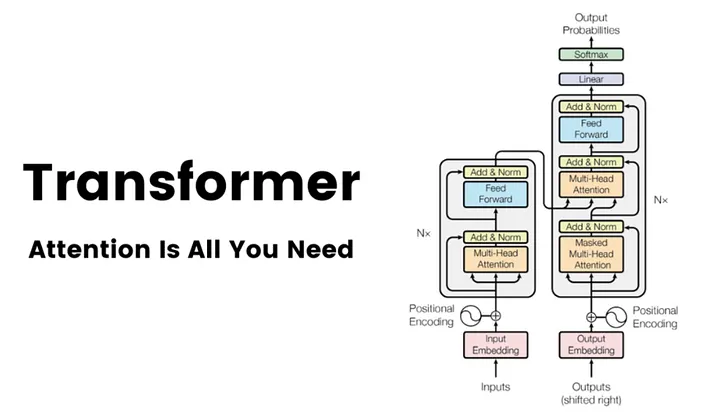

##### <span style="background-color:#FFDDEB; color:#000000; padding:4px; border-radius:5px;"> 2-1. Self-Attention

> 기본 구조: Query, Key, Value
- Quary: 말 그래로 '질문', '요철' => 지금 당장 내가 알고 싶거나, 초점을 맞추고 있는 대상
- Key: 검색 대상이 되는 모든 정보들이 달고있는 '이름표', '색인' => 쿼라는 이 키들과 자신을 비교하며 얼마나 관련있는지 확인
- Value: 키와 한 쌍으로 묶여 있는 '실제 내용물' => 쿼리와 키의 관련도 계산이 끝난 후 가장 관련성이 높다고 판단된 키가 선택되면, 모델은 그 키에 해당하는 벨류를 가져와 사용

##### <span style="background-color:#FFDDEB; color:#000000; padding:4px; border-radius:5px;"> 2-2. Cross-Attention vs. Self-Attention
- 기존 어텐션의 핵심 아이디어: 번역할 문장을 슬쩍슬쩍 보며 단어를 생성
- 셀프 어텐션의 핵심 아이디어: 문장 자체를 뜯어보며 내부 관계 파악                           
                                       
- 기존 어텐션의 작동 방식: 하나의 시퀀스가 완전히 다른 시퀀스를 참고하여 정보를 만듦
- 셀프 어텐션의 작동 방식: 한 문장 내 모든 단어끼리 서로의 관계를 계산      


- 기존 어텐션의 참조 대상: 서로 다른 시퀀스 (인코더와 디코더)
- 셀프 어텐션의 참조 대상: 동일한 시퀀스 (문장 내부와 문장 내부)    

- 기존 어텐션의 주요 목적: 인코더와 디코더 연결, 정보 병목 현상 해소
- 셀프 어텐션의 주요 목적: 시퀸스 내부의 문맥 및 의존 관계 파악

- 기존 어텐션의 기반 아키텍쳐: RNN
- 셀프 어텐션의 기반 아키텍쳐: 트랜스포머

- 기존 어텐션은 병렬 처리 불가능하지만 셀프 어텐션은 병렬 처리 가능하다.


##### <span style="background-color:#FFDDEB; color:#000000; padding:4px; border-radius:5px;"> 2-3. Scaled Dot-Product Attention   
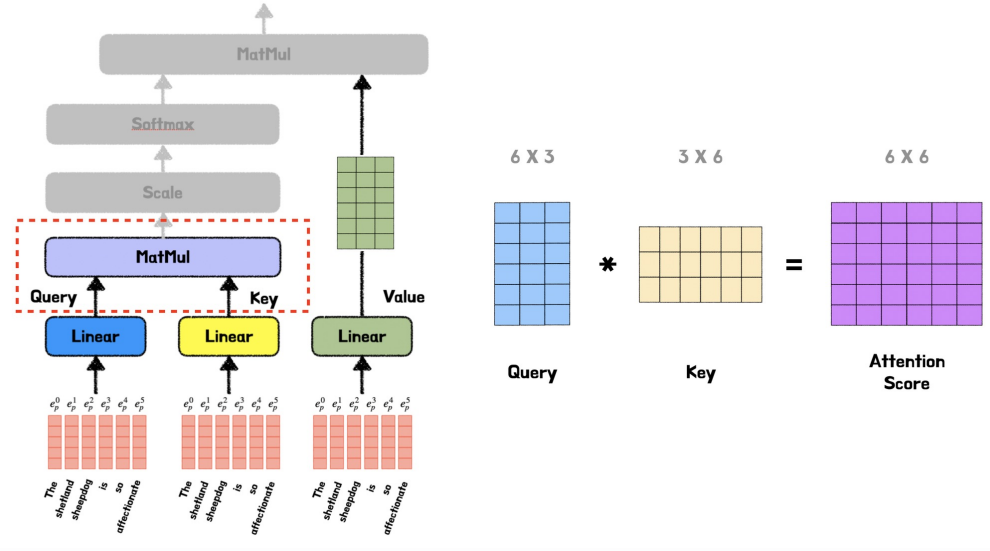              
##### 💡 Dot-Product Attention이란?
- Attention Score를 계산하는 가장 기본적이 방법 중 하나
- 쿼리와 키 벡터를 *내적(Dot Product)*하여 유사도를 구함     
##### 문제점😭
- 벡터의 차원이 커질수록 내적의 결과가 너무 커지거나 작아짐
- 극단적인 어텐션 스코어가 소프트맥스 함수에 들어가게 되면 기울기가 0에 가까워지는 `기울기 소실`이 여기에서도 발생!!       

##### 💡 Scaled Dot-Product Attention이란?          
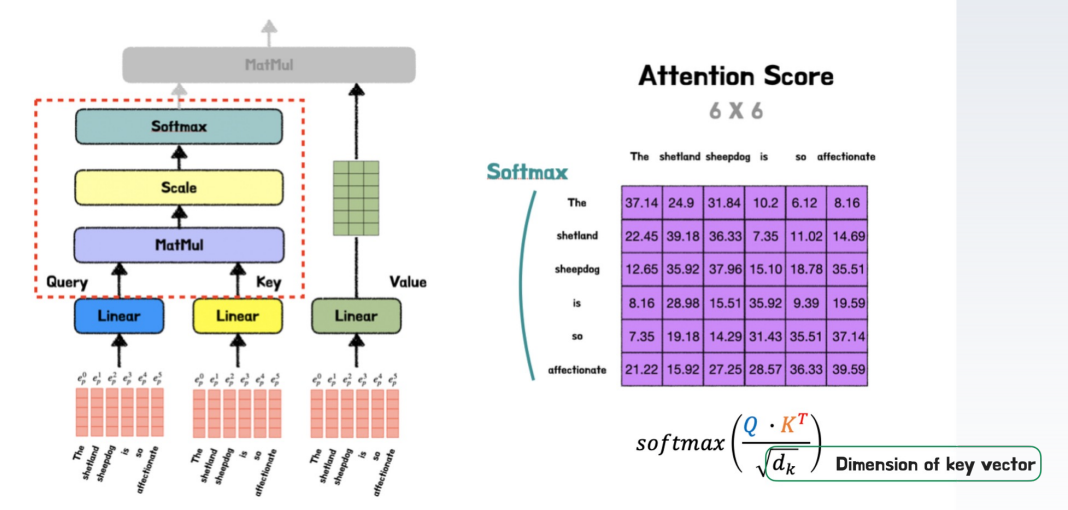                
- 기존의 Dot-Product Attention의 문제를 해결하기 위해 제안된 현재 트랜스포머 방식의 쵸준
- Transformer의 어텐션 계산 공식 자체
##### ❓ 기존의 문제를 어떻게 해결함?
- Dot-Prodct Attention 과정에서 내적을 진행한 후에 값의 크기를 맞추는 `스케일링` 과정 추가!
- 한번의 나눗셈으로, 계산된 내적 값이 과도하게 증가하는 것을 방지하여 안정적인 분포를 형성 => 소프트맥스 함수가 안정적으로 학습 진행 
##### Scaled Dot-Product Attention 계산의 결과로 얻어지는 벡터
- Cross-Attention: 현재 생성 중인 단어가 입력 문장에서 어떤 단어들에 집중해야 하는지 => Context Vector
- Self-Attention: 문장 내 다른 단어들과의 관계 반영 => 문맥적 표현 

#### 3. 트랜스포머의 전처리 과정

##### <span style="background-color:#FFC0CB; color:#000000; padding:4px; border-radius:5px;"> 3-1. Positional Encoding </span>

1. 토큰화: 입력 테스트 모델이 처리할 수 있는 단위(토큰)로 나누는 첫번째 단계
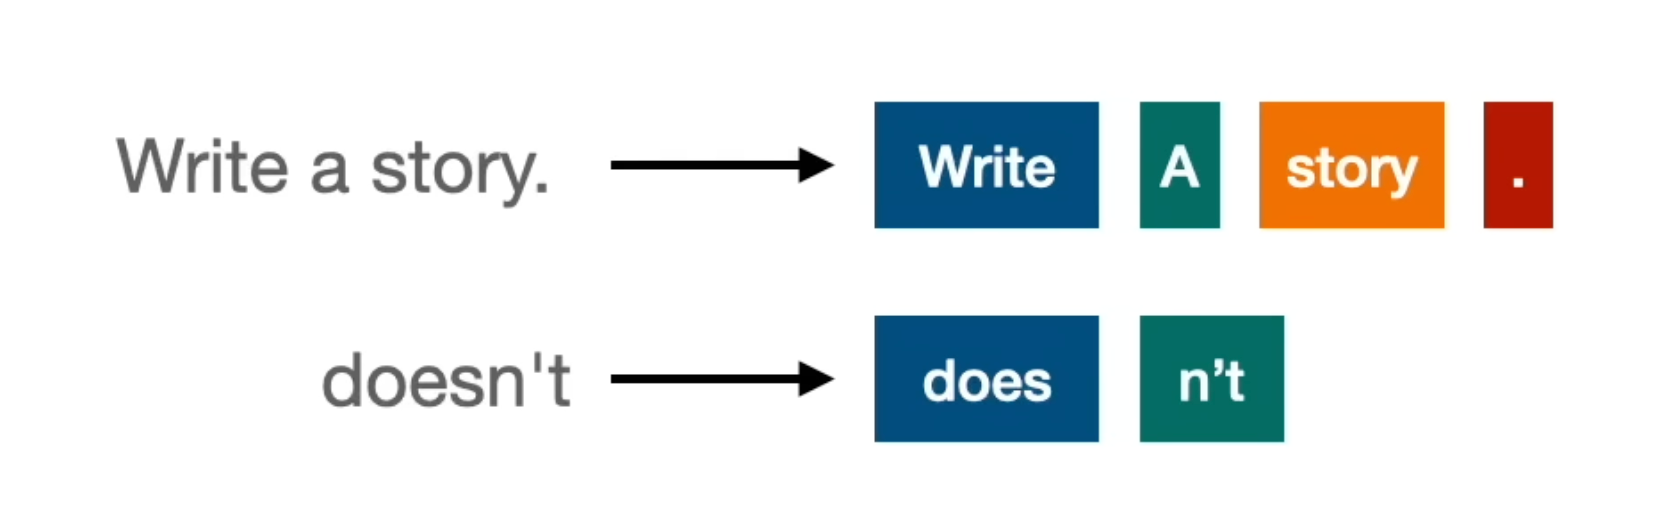          
2. 임베팅: 토큰화된 각 단위를 임베딩 단계에서 숫자 벡터로 변환
3. Positional Encoding: 단어들의 순서 정보를 인베딩 벡터에 추가 
> Positional Encoding는 어떨게 동작할까
- 각 단어의 임베팅 좌표에 일관된 순서를 따르는 다른 숫자 추가 => 순서 정보 기록
- 즉, 같은 단어라도 문장에서 차지하는 위치가 다르면 다른 좌표!(수정된 임베딩) => 모델이 순서를 학습

#### 4. 트랜스포머의 인코더/디코더 구조

##### <span style="background-color:#FF69B4; color:#000000; padding:4px; border-radius:5px;"> 4-1. Multi-Head Attention </span> 
##### Single-Head Attention 먼저 알아부자..
- 문장 내 단어들 간의 관계를 파악하기 위해 하나의 가중치 행렬만을 학습하고 번역에 사용
- 작동 방식: 512차원의 입력 벡터 -> 이 벡터를 위한 어텐션 가중치 분포 계산 -> 가중합하여 새로운 512차원의 벡터 출력
- 한계ㅠㅠ: 각 단어 간의 중요한 관계를 놓쳐버릴 수 있음!

##### 그래서 Multi-Head Attention은..
- 한 단어와 다른 단어 간의 관계를 여러 차원으로 나누어 병렬로 학습 
- 512차원의 입력 벡터를 64차원씩 8개의 벡터로 나누고 Attention 스코어를 여러번 계산하는 과정           


##### <span style="background-color:#FF69B4; color:#000000; padding:4px; border-radius:5px;"> 4-2. Multi-Head Attention의 핵심 원리 및 장점 </span> 
1. 분할: 하나의 512차원 벡터가 들어오면, 이 벡터를 8개의 작은 벡터 그룹으로 투영 => 8개의 서로 다른 관점으로 나눔
2. 병렬 어텐션 계산: 
    - 8개의 헤드는 서로 간섭 X
    - 병렬로 Scaled Dot-Product Attention 계산
    - 각 헤드 내에서는 점수 계산, 크기 조절, 가중치 변환, 가중합 
    - 이 결과를 바탕으로 64차원의 벡터1
3. 결합 및 최종 투영 - 전문가들의 분석 결과 취합
    - 8명의 헤드 각자가 내놓은 8개의 분석 결과 취합
    - 8개의 서로 다른 관점에서 분석된 정보가 조화롭게 융합된, 매우 풍부한 문백적 의미 

##### <span style="background-color:#FF69B4; color:#000000; padding:4px; border-radius:5px;"> 4-3. Masked Multi-Head Attention </span> 
: 미래 시점의 단어 정보를 참고하지 못하도록 마스크를 적용하는 어텐션 메커니즘
- Look-Ahead Mask를 사용하여 현재 단어보다 오른쪽(미래)에 있는 토큰의 어텐션 값을 0으로 만들어 무시 

##### <span style="background-color:#FF69B4; color:#000000; padding:4px; border-radius:5px;"> 4-4. Encoder-Decoder Attention </span> 

- 인코더: 입력 문장의 문맥적 의미 깊이 이해하기 
    - 셀프 어텐션을 이용해 문장 내 모든 단어 간의 관계 파악 => 이 과정을 N번 반복 => 문장 완벽 이해             
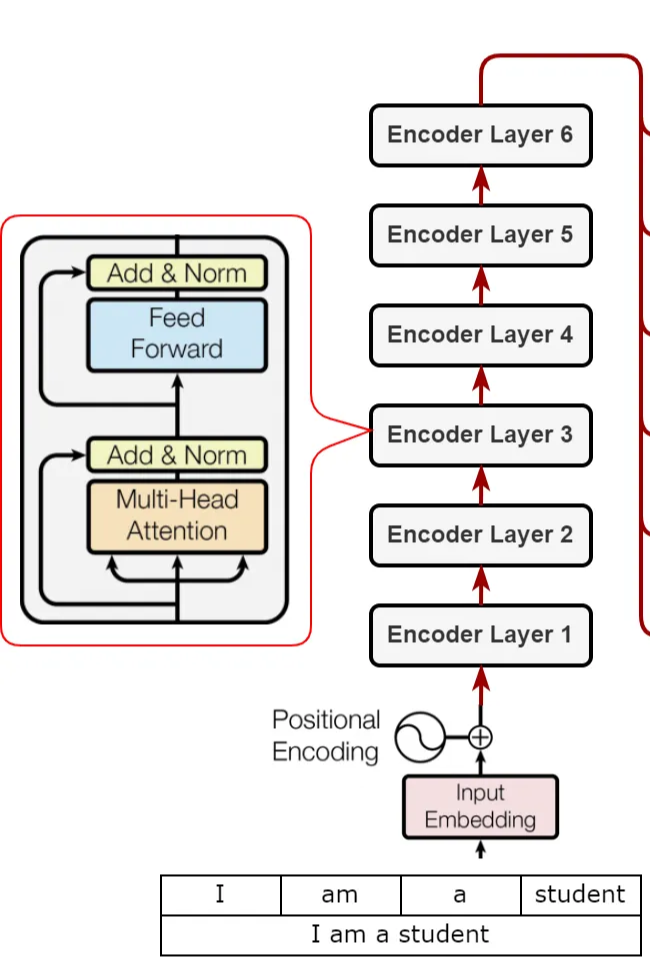         
    - 인코더 레어이는 Multi-Head Attention와 Feed-Forward 두 가지 주요 하위 레이어로 구성 
##### Feed-Forward란?
- 입력 벡터의 차원을 확장하고 비선형 변환을 적용 => 새로운 표현 생성 
- 디코더: 번역 문장을 한 단어씩 생성하기               
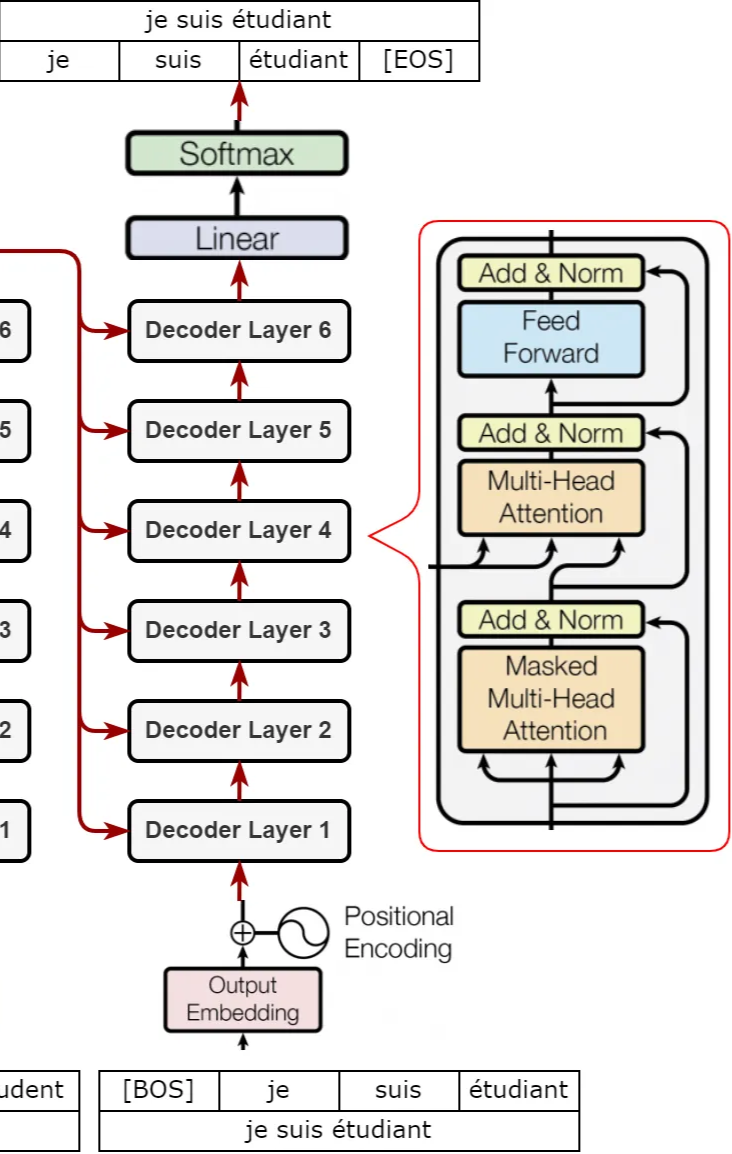                
    - 디코더는 <start> 토큰을 시작으로 인코더의 이해를 참조하며 출력 생성
    - 디코더 레이어는 1. Masked Multi-Head Attention, Encoder-Decoder Multi-Head Attention (Cross-Attention), Feed-Forward Layer 세 가지 하위 레이어로 구성 
##### Masked Multi-Head Attention이란?
- 미래 시점의 단어 정보를 참고하지 못하도록 마스크를 적용하는 어텐션 메커니즘 